In [1]:
#air quality index meter

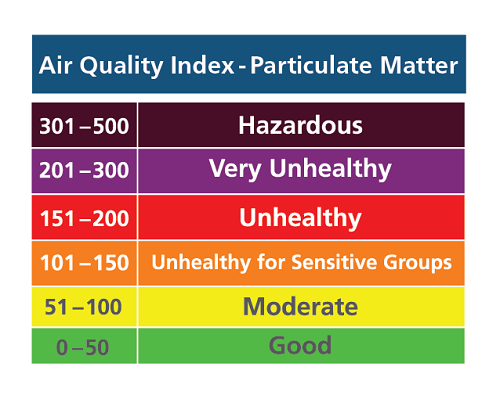

In [2]:
from IPython.display import Image
Image("http://www.sparetheair.com/assets/aqi/PM2017.png")


In [3]:
#2.Import the dataset

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tkinter import *


DT=pd.read_csv("datam.csv",encoding = "latin1",low_memory = False)
df=pd.DataFrame(DT)
print(df)


       stn_code       sampling_date                        state   location  \
0           150  February - M021990               Andhra Pradesh  Hyderabad   
1           151  February - M021990               Andhra Pradesh  Hyderabad   
2           152  February - M021990               Andhra Pradesh  Hyderabad   
3           150     March - M031990               Andhra Pradesh  Hyderabad   
4           151     March - M031990               Andhra Pradesh  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN                 NaN                  Lakshadweep        NaN   
435741      NaN                 NaN                      Tripura        NaN   

                                           agency  

# telangana ciities

In [5]:
cities = ['Hyderabad','Ramagundam','Patancheru','Nalgonda','Warangal','Khammam','Karimnagar','Nizamabad','Sangareddy']

In [6]:
for city in cities:
    df.loc[df.location == city, 'state'] = 'Telangana'

In [7]:
print(df.columns)
print(df)

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')
       stn_code       sampling_date                        state   location  \
0           150  February - M021990                    Telangana  Hyderabad   
1           151  February - M021990                    Telangana  Hyderabad   
2           152  February - M021990                    Telangana  Hyderabad   
3           150     March - M031990                    Telangana  Hyderabad   
4           151     March - M031990                    Telangana  Hyderabad   
...         ...                 ...                          ...        ...   
435737     SAMP            24-12-15                  West Bengal   ULUBERIA   
435738     SAMP            29-12-15                  West Bengal   ULUBERIA   
435739      NaN                 NaN  andaman-and-nicobar-islands        NaN   
435740      NaN      

In [8]:
#3.Cleaning the dataset

In [9]:
df['so2']=df['so2'].fillna(0).astype('str').astype('float')
df['no2']=df['no2'].fillna(0).astype('str').astype('float')
df['rspm']=df['rspm'].fillna(0).astype('str').astype('float')
df['spm']=df['spm'].fillna(0).astype('str').astype('float')
df['pm2_5']=df['pm2_5'].fillna(0).astype('str').astype('float')
df=df.rename(index=str,columns={'date':'year'})

df.drop(['stn_code','agency','location_monitoring_station'],axis=1,inplace=True)
#df.drop('stn_code')
#df.drop('agency')
#df.drop('location_monitoring_station')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435742 entries, 0 to 435741
Data columns (total 10 columns):
sampling_date    435739 non-null object
state            435742 non-null object
location         435739 non-null object
type             430349 non-null object
so2              435742 non-null float64
no2              435742 non-null float64
rspm             435742 non-null float64
spm              435742 non-null float64
pm2_5            435742 non-null float64
year             435735 non-null object
dtypes: float64(5), object(5)
memory usage: 36.6+ MB


In [10]:
#4.Dataset Summary

In [11]:
print('Describe evry single gas values')
df.describe()

Describe evry single gas values


,so2,no2,rspm,spm,pm2_5
count,435742.000000,435742.000000,435742.000000,435742.000000,435742.000000
mean,9.968364,24.848119,98.786766,100.503296,0.871919
std,11.116635,18.801635,77.979702,150.074247,7.424595
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.000000,47.000000,0.000000,0.000000
50%,7.183333,21.000000,83.000000,0.000000,0.000000
75%,13.000000,32.000000,135.000000,172.000000,0.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [12]:
#5 Every Single state Air pollution Gase values

In [13]:
df.groupby(['state', 'type']).count()

sampling_date  location  \
state          type                                                          
Andhra Pradesh Industrial Area                              3146      3146   
               Industrial Areas                              872       872   
               Residential and others                       2528      2528   
               Residential, Rural and other Areas           6266      6266   
               Sensitive Area                               1863      1863   
...                                                          ...       ...   
West Bengal    Industrial Areas                             4059      4059   
               RIRUO                                         831       831   
               Residential                                    11        11   
               Residential and others                       3661      3661   
               Residential, Rural and other Areas           5572      5572   

                                                    so2   no2  rspm   spm  \
state          type                                                         
Andhra Pradesh Industrial Area                     3146  3146  3146  3146   
               Industrial Areas                     872   872   872   872   
               Residential and others              2528  2528  2528  2528   
               Residential, Rural and other Areas  6266  6266  6266  6266   
               Sensitive Area                      1863  1863  1863  1863   
...                                                 ...   ...   ...   ...   
West Bengal    Industrial Areas                    4059  4059  4059  4059   
               RIRUO                                831   831   831   831   
               Residential                           11    11    11    11   
               Residential and others              3661  3661  3661  3661   
               Residential, Rural and other Areas  5572  5572  5572  5572   

                                                   pm2_5  year  
state          type                                             
Andhra Pradesh Industrial Area                      3146  3146  
               Industrial Areas                      872   872  
               Residential and others               2528  2528  
               Residential, Rural and other Areas   6266  6266  
               Sensitive Area                       1863  1863  
...                                                  ...   ...  
West Bengal    Industrial Areas                     4059  4059  
               RIRUO                                 831   831  
               Residential                            11    11  
               Residential and others               3661  3661  
               Residential, Rural and other Areas   5572  5572  

[161 rows x 8 columns]

In [14]:
#5.1 Top 5 Most Populated States are

In [15]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

#..............State...........#

state=df.groupby(['state'],as_index=False).mean()

state

df['total']=state.sum(axis=1)
df.fillna(0.0,inplace=True)


In [16]:

#............. Adding a column of maximum to the 'state' dataframe...................#
state['total']=state.sum(axis=1)
print("The State with highest amount of air-pollution is :-\n\n")
print(state[state['total']==(state['total'].max())])

The State with highest amount of air-pollution is :-


   state       so2        no2        rspm         spm     pm2_5      total
8  Delhi  7.980131  50.086259  153.315092  254.980236  4.126652  470.48837


In [17]:
#............. Adding a column of minimum to the 'state'.................#
#print("The State with lowest amount of air-pollution is :-\n\n")
print(state[state['total']==(state['total'].min())])

                          state  so2  no2  rspm  spm  pm2_5  total
17                  Lakshadweep  0.0  0.0   0.0  0.0    0.0    0.0
31                      Tripura  0.0  0.0   0.0  0.0    0.0    0.0
36  andaman-and-nicobar-islands  0.0  0.0   0.0  0.0    0.0    0.0


In [18]:
#................ top 5  .............#

#print("Top 5 Least Populated States are :-\n\n")
state.tail().sort_values(['total'],ascending=True)

,state,so2,no2,rspm,spm,pm2_5,total
36,andaman-and-nicobar-islands,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33,Uttarakhand,13.932731,15.385345,145.636187,20.335880,0.000000,195.290142
35,West Bengal,11.963817,58.678615,109.058223,135.199477,1.848818,316.748950
32,Uttar Pradesh,11.789068,26.662159,159.143837,191.850080,0.000000,389.445143
34,Uttaranchal,22.964561,25.256842,113.154386,278.364912,0.000000,439.740702


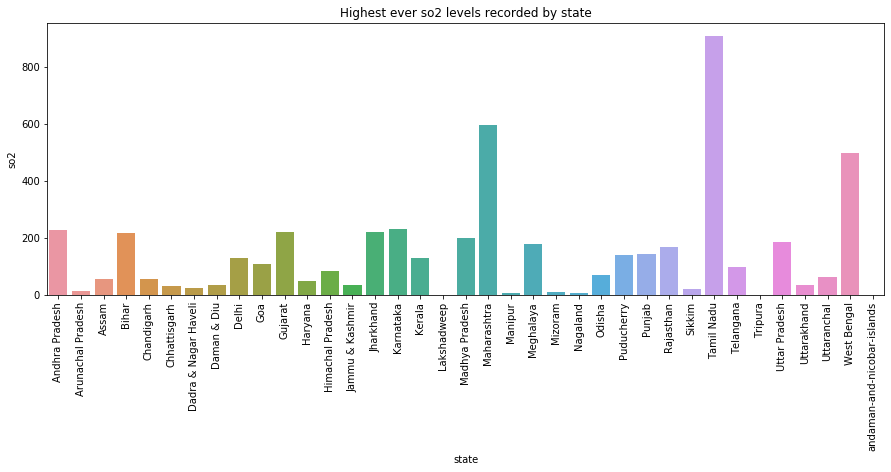

In [19]:
# defining a function to find the highest ever recorded levels for a given indicator (defaults to SO2) by state
# sidenote: mostly outliers

def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(15,5))
    ind = df[[indicator, 'location', 'state', 'year']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
highest_levels_recorded("so2")
#highest_levels_recorded("rspm")
#highest_levels_recorded("no2")

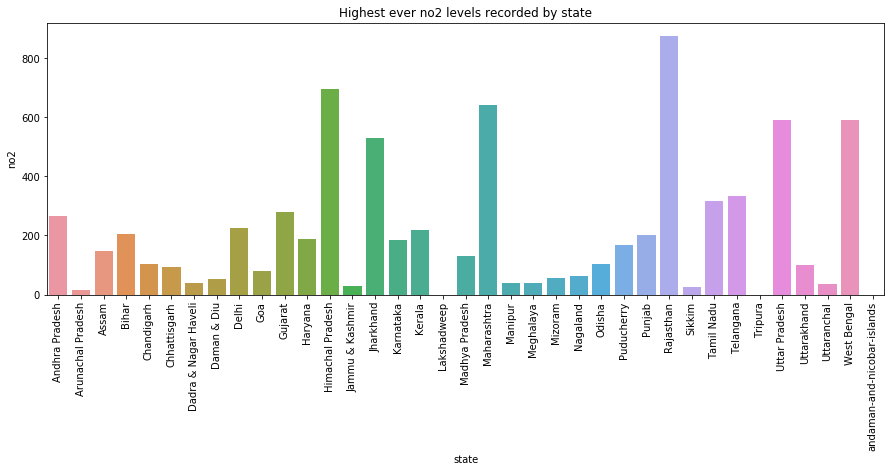

In [20]:
def highest_levels_recorded(indicator="no2"):
    plt.figure(figsize=(15,5))
    ind = df[[indicator, 'location', 'state', 'year']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
highest_levels_recorded("no2")

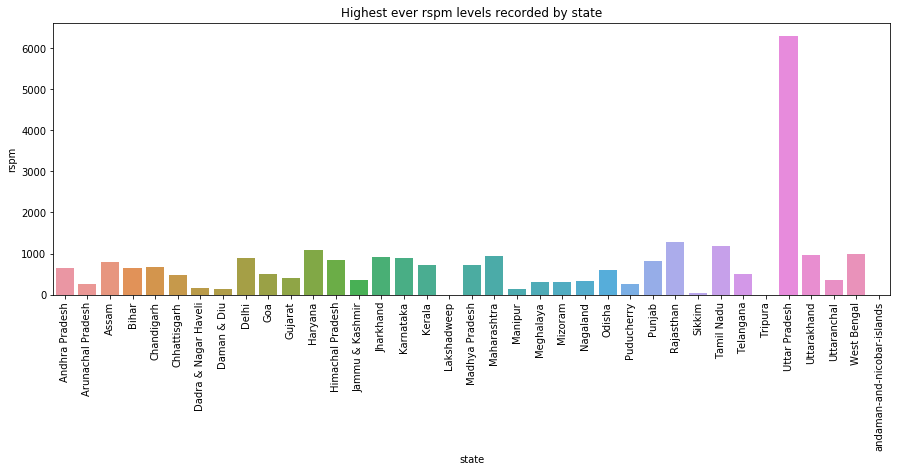

In [21]:
def highest_levels_recorded(indicator="rspm"):
    plt.figure(figsize=(15,5))
    ind = df[[indicator, 'location', 'state', 'year']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
highest_levels_recorded("rspm")

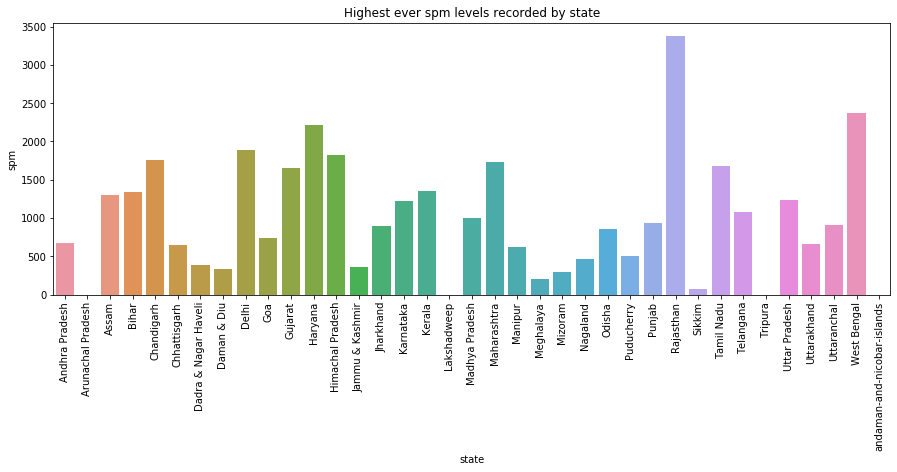

In [22]:
def highest_levels_recorded(indicator="spm"):
    plt.figure(figsize=(15,5))
    ind = df[[indicator, 'location', 'state', 'year']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
highest_levels_recorded("spm")

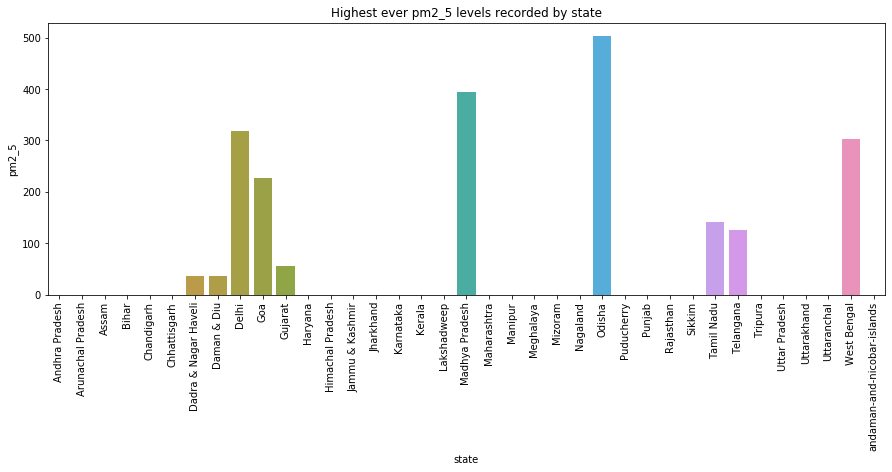

In [23]:
def highest_levels_recorded(indicator="pm2_5"):
    plt.figure(figsize=(15,5))
    ind = df[[indicator, 'location', 'state', 'year']].groupby('state', as_index=False).max()
    highest = sns.barplot(x='state', y=indicator, data=ind)
    highest.set_title("Highest ever {} levels recorded by state".format(indicator))
    plt.xticks(rotation=90)
highest_levels_recorded("pm2_5")

/home/arun/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


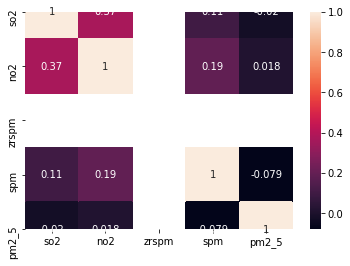

In [24]:
sns.heatmap(df.loc[:, ['state','so2', 'no2', 'zrspm', 'spm', 'pm2_5']].corr(),annot=True)


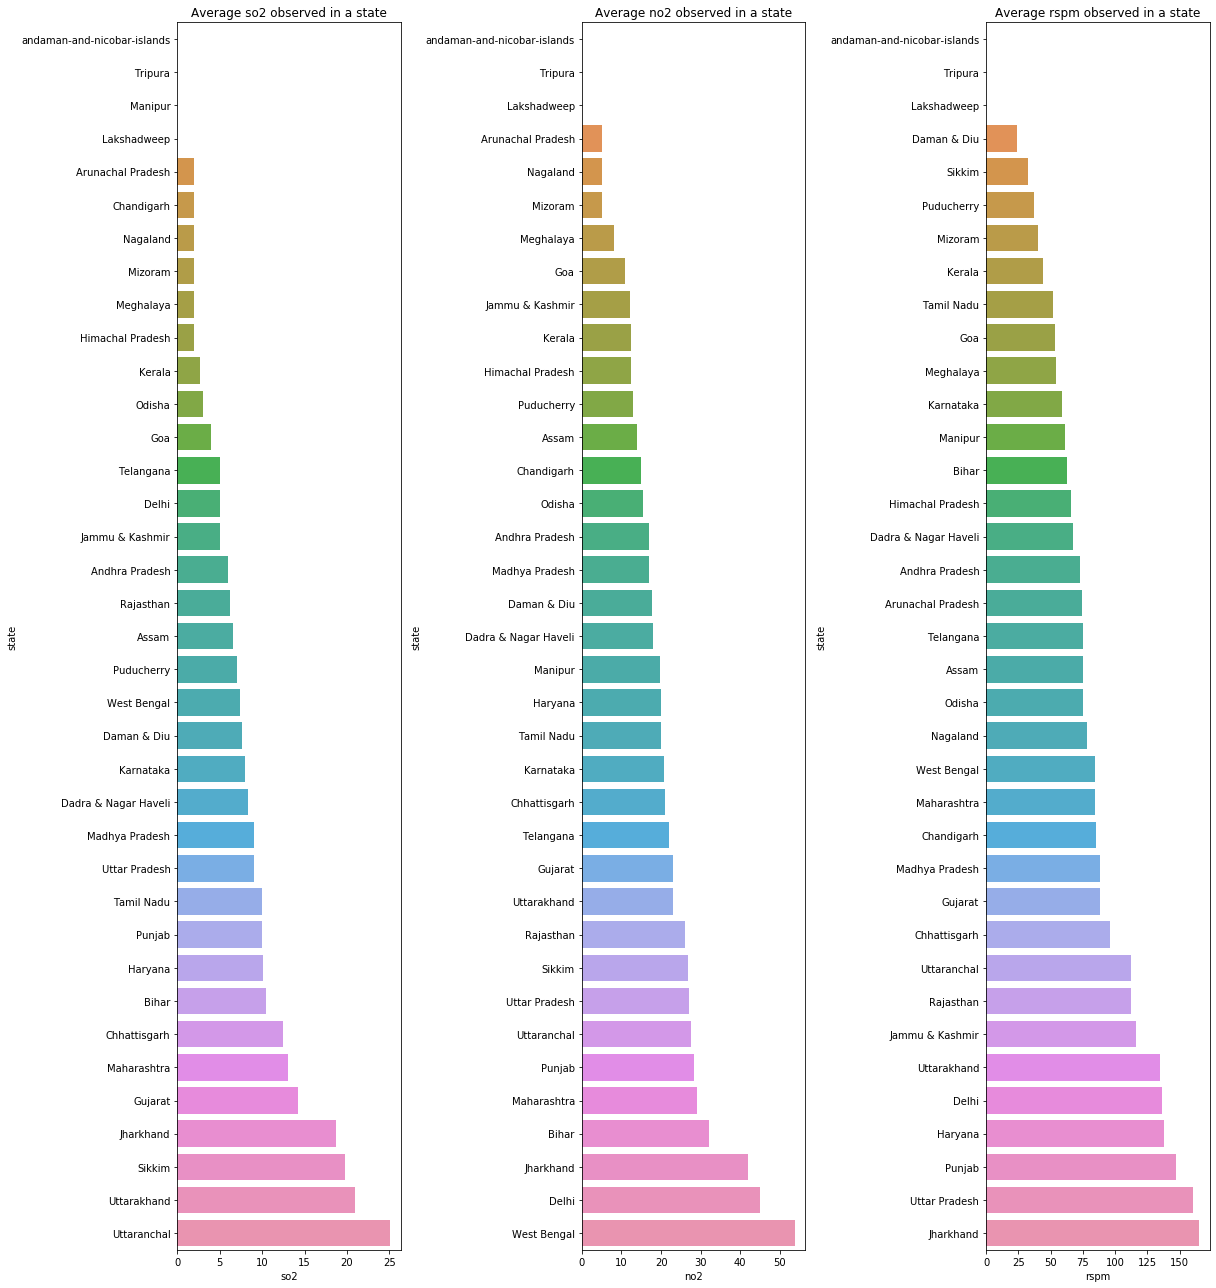

In [25]:
#....................Find out the states with minmum/maximum pollution parameters...............#

fig, axes= plt.subplots(figsize=(17, 18), ncols=3)

state_wise_max_so2 = df[['state','so2']].dropna().groupby('state').median().sort_values(by='so2')

state_wise_max_no2 = df[['state','no2']].dropna().groupby('state').median().sort_values(by='no2')

state_wise_max_rspm = df[['state','rspm']].dropna().groupby('state').median().sort_values(by='rspm')

#state_wise_max_spm = df[['state','spm']].dropna().groupby('state').median().sort_values(by='spm')

#state_wise_max_pm2_5 = df[['state','pm2_5']].dropna().groupby('state').median().sort_values(by='pm2_5')


sns.barplot(x='so2', y=state_wise_max_so2.index, data=state_wise_max_so2, ax=axes[0])
axes[0].set_title("Average so2 observed in a state")

sns.barplot(x='no2', y=state_wise_max_no2.index, data=state_wise_max_no2, ax=axes[1])
axes[1].set_title("Average no2 observed in a state")

sns.barplot(x='rspm', y=state_wise_max_rspm.index, data=state_wise_max_rspm, ax=axes[2])
axes[2].set_title("Average rspm observed in a state")

#sns.barplot(x='spm', y=state_wise_max_spm.index, data=state_wise_max_spm, ax=axes[3])
#axes[3].set_title("Average spm observed in a state")

#sns.barplot(x='pm2_5', y=state_wise_max_pm2_5.index, data=state_wise_max_pm2_5, ax=axes[4])
#axes[4].set_title("Average pm2_5 observed in a state")

plt.tight_layout()

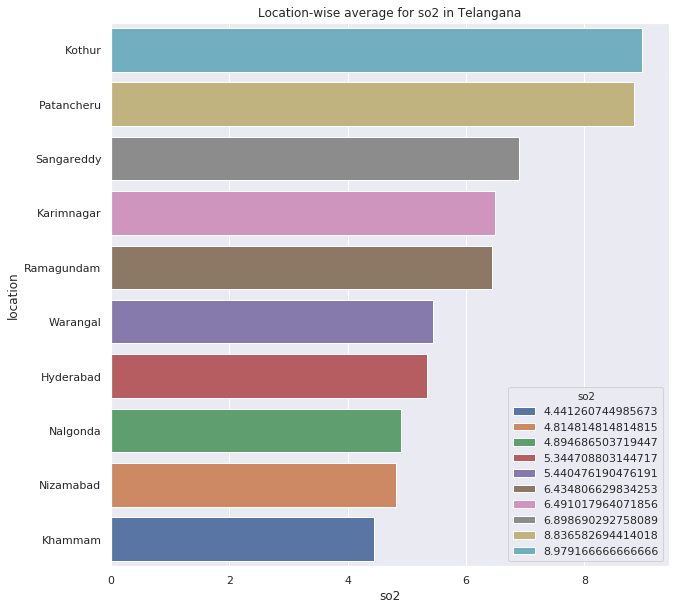

In [26]:
# defining a function to plot pollutant averages for a given indicator (defaults to NO2) by locations in a given state

def location_avgs(state, indicator="so2"):
    locs = df[VALUE_COLS + ['state', 'location', 'year']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    state_avgs = state_avgs.sort_values(by=indicator,ascending=False).head(15)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.barplot(x=indicator, y='location', data=state_avgs,hue='so2',dodge=False)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    #plt.xticks(rotation = 90,size=20)
location_avgs("Telangana", "so2")

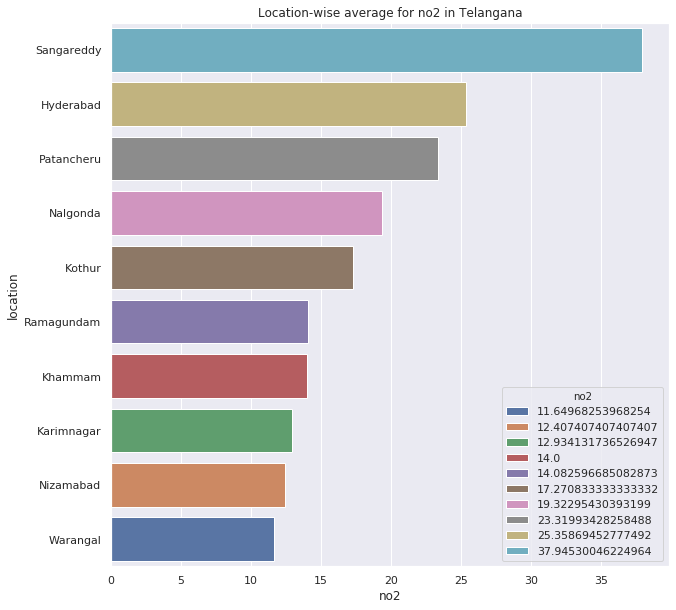

In [27]:
# defining a function to plot pollutant averages for a given indicator (defaults to NO2) by locations in a given state

def location_avgs(state, indicator="no2"):
    locs = df[VALUE_COLS + ['state', 'location', 'year']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    state_avgs = state_avgs.sort_values(by=indicator,ascending=False).head(15)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.barplot(x=indicator, y='location', data=state_avgs,hue='no2',dodge=False)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    #plt.xticks(rotation = 90,size=20)
location_avgs("Telangana", "no2")

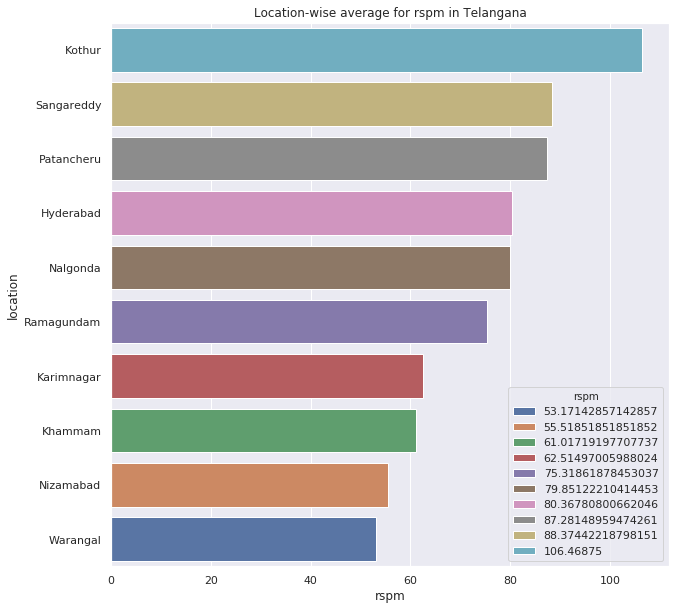

In [28]:
def location_avgs(state, indicator="rspm"):
    locs = df[VALUE_COLS + ['state', 'location', 'year']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    state_avgs = state_avgs.sort_values(by=indicator,ascending=False).head(15)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.barplot(x=indicator, y='location', data=state_avgs,hue='rspm',dodge=False)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    #plt.xticks(rotation = 90,size=20)
location_avgs("Telangana", "rspm")

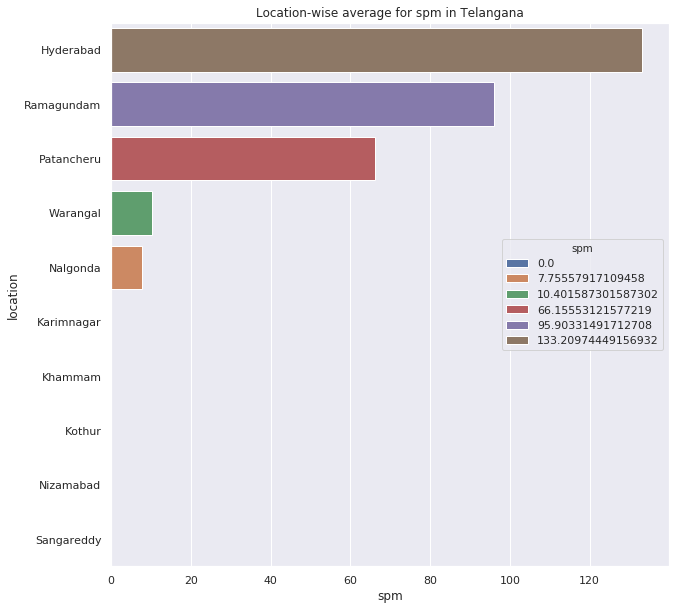

In [29]:
def location_avgs(state, indicator="spm"):
    locs = df[VALUE_COLS + ['state', 'location', 'year']].groupby(['state', 'location']).mean()
    state_avgs = locs.loc[state].reset_index()
    state_avgs = state_avgs.sort_values(by=indicator,ascending=False).head(15)
    sns.set(rc={'figure.figsize':(10,10)})
    sns.barplot(x=indicator, y='location', data=state_avgs,hue='spm',dodge=False)
    plt.title("Location-wise average for {} in {}".format(indicator, state))
    #plt.xticks(rotation = 90,size=20)
location_avgs("Telangana", "spm")

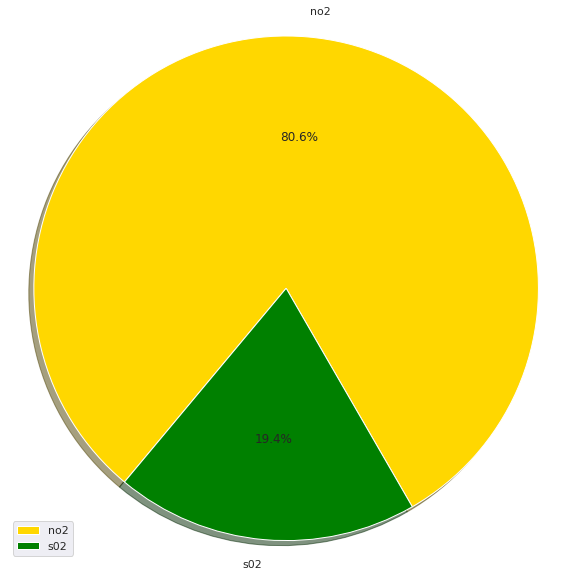

In [31]:
#andhra pradesh // telanga
labels='no2','s02'
sizes=[23.47,5.65]
colors=['gold','green']
explode=(0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=300)
plt.legend(labels,loc='best')
plt.axis('equal')
plt.show()

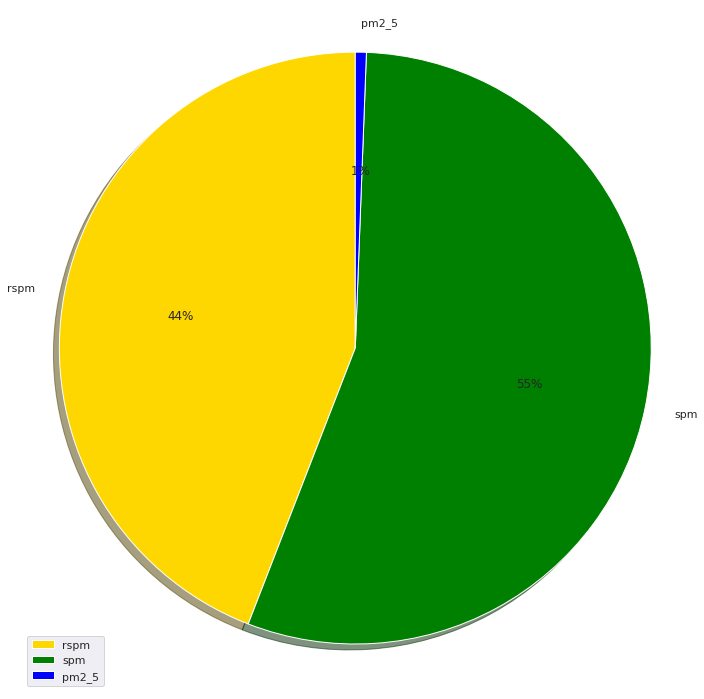

In [32]:



labels='rspm','spm','pm2_5'
sizes=[78.68,98.63,1.07]
colors=['gold','green','blue']
explode=(0,0,0)

plt.pie(sizes,labels=labels, colors=colors,radius=1,autopct='%2.f%%', shadow=True, startangle=90)
plt.legend( labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

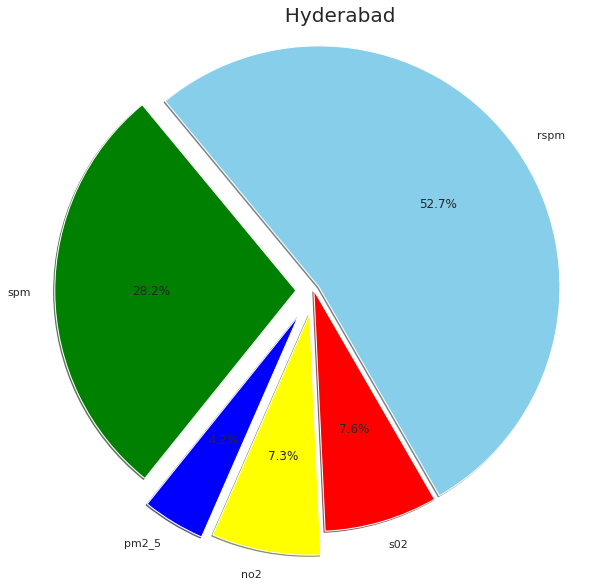

In [33]:
labels='rspm','spm','pm2_5','no2','s02'
sizes=[6307.0,3380.0,504.0,876.0,909.0]
colors=['skyblue','green','blue','yellow','red']
explode=(0.1,0.3,0.5,0.4,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,radius=4,autopct='%1.1f%%',shadow=True,startangle=300)
plt.axis('equal')
plt.title('          Hyderabad',size=20)

plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33231a61d0>],
      dtype=object)

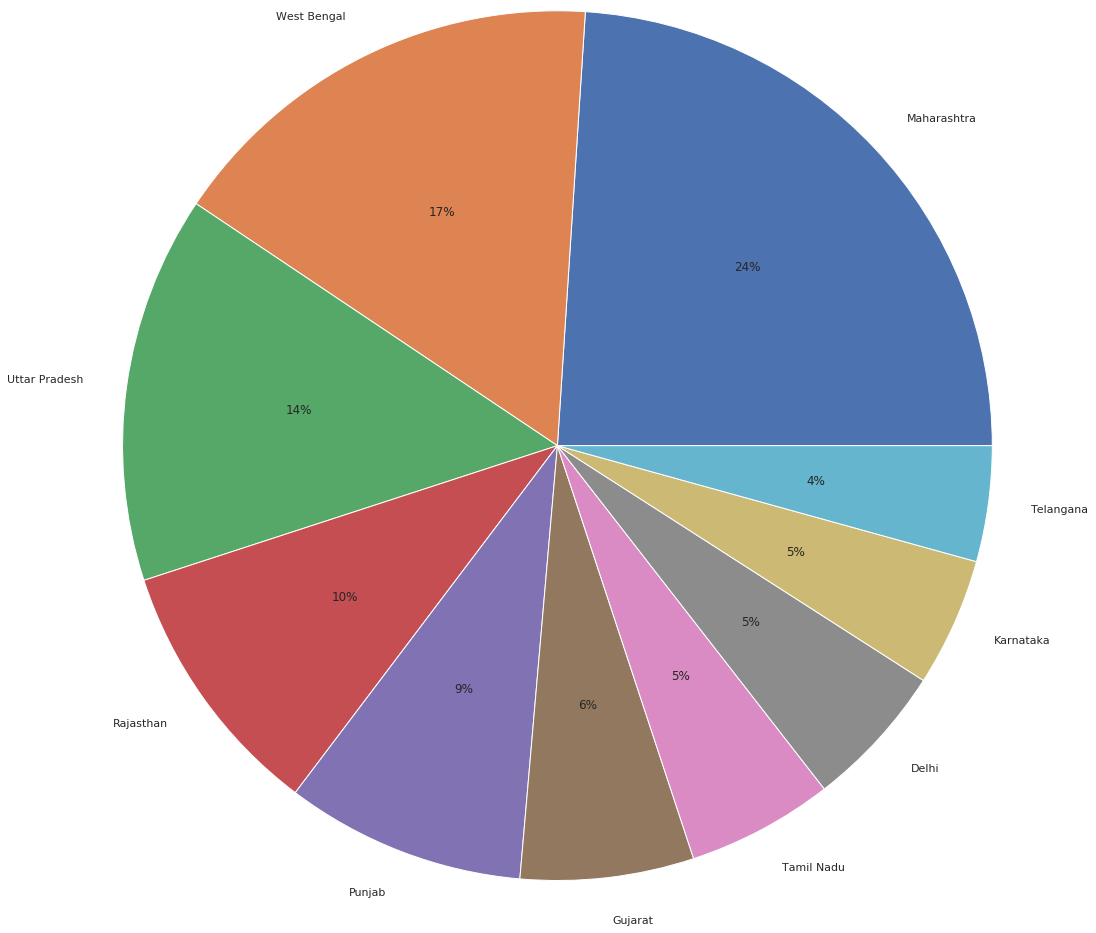

In [34]:
d=df.groupby(['state'])['no2'].sum().sort_values(kind='mergesort',ascending=False).head(10)
d.plot(kind='pie',autopct='%.0f%%',radius=2,subplots=True)

In [35]:
#conclusion